In [14]:
# load and split data
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

In [15]:
# Use k-means with k=3 as the cluster method, run on the whole dataset
# and add the cluster label as a new column in X.
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3,n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
X_with_labels = np.column_stack((X,labels))

In [16]:
# Randomly split the iris dataset (5:95 splitting as above)
from sklearn.model_selection import train_test_split

def prep_data(data):
    return train_test_split(data, y, test_size=0.95)

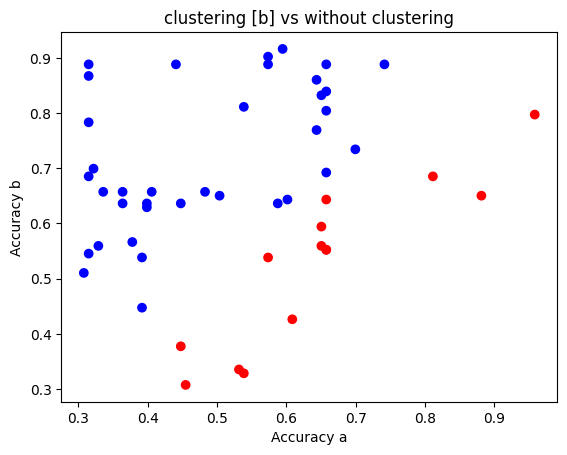

In [17]:
# GaussianNB with&&without clustering
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

accuracy_a_list = []
accuracy_b_list = []


for i in range(0, 50):
    # Prepare data without clustering column [a]
    train_x_a, test_x_a, train_y_a, test_y_a = prep_data(X)
    # Prepare data with clustering column [b]
    train_x_b, test_x_b, train_y_b, test_y_b = prep_data(X_with_labels)
    # Get [a] prediction
    clf_a = GaussianNB()
    clf_a.fit(train_x_a, train_y_a)
    predictions_a = clf_a.predict(test_x_a)
    accuracy_a = accuracy_score(test_y_a, predictions_a)
    accuracy_a_list.append(accuracy_a)
    # Get [b] prediction
    clf_b = GaussianNB()
    clf_b.fit(train_x_b, train_y_b)
    predictions_b = clf_b.predict(test_x_b)
    accuracy_b = accuracy_score(test_y_b, predictions_b)
    accuracy_b_list.append(accuracy_b)

color_list = ['r' if a > b else 'b' for a, b in zip(accuracy_a_list, accuracy_b_list)]

plt.scatter(accuracy_a_list, accuracy_b_list,c=color_list)
plt.ylabel('Accuracy b')
plt.xlabel('Accuracy a')
plt.title("clustering [b] vs without clustering")
plt.savefig("./clustering-[b]-vs-without-clustering.png")
plt.show()
